In [4]:
from google.colab import files
uploaded = files.upload()  # Choose your smaller accident CSV file


Saving Accident_Information.csv to Accident_Information.csv


In [5]:
import pandas as pd

# Load your uploaded CSV file
df = pd.read_csv('Accident_Information.csv')

# Show the first 5 rows to verify the data loaded correctly
df.head()


/tmp/ipython-input-3442651881.py:4: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Accident_Information.csv')


,Accident_Index,1st_Road_Class,1st_Road_Number,2nd_Road_Class,2nd_Road_Number,Accident_Severity,Carriageway_Hazards,Date,Day_of_Week,Did_Police_Officer_Attend_Scene_of_Accident,...,Police_Force,Road_Surface_Conditions,Road_Type,Special_Conditions_at_Site,Speed_limit,Time,Urban_or_Rural_Area,Weather_Conditions,Year,InScotland
0,200501BS00001,A,3218.0,NaN,0.0,Serious,NaN,2005-01-04,Tuesday,1.0,...,Metropolitan Police,Wet or damp,Single carriageway,NaN,30.0,17:42,Urban,Raining no high winds,2005,No
1,200501BS00002,B,450.0,C,0.0,Slight,NaN,2005-01-05,Wednesday,1.0,...,Metropolitan Police,Dry,Dual carriageway,NaN,30.0,17:36,Urban,Fine no high winds,2005,No
2,200501BS00003,C,0.0,NaN,0.0,Slight,NaN,2005-01-06,Thursday,1.0,...,Metropolitan Police,Dry,Single carriageway,NaN,30.0,00:15,Urban,Fine no high winds,2005,No
3,200501BS00004,A,3220.0,NaN,0.0,Slight,NaN,2005-01-07,Friday,1.0,...,Metropolitan Police,Dry,Single carriageway,NaN,30.0,10:35,Urban,Fine no high winds,2005,No
4,200501BS00005,Unclassified,0.0,NaN,0.0,Slight,NaN,2005-01-10,Monday,1.0,...,Metropolitan Police,Wet or damp,Single carriageway,NaN,30.0,21:13,Urban,Fine no high winds,2005,No


In [6]:
# Shape of dataset
print("Dataset Shape:", df.shape)

# Column names
print("\nColumn Names:")
print(df.columns)

# Data types & non-null counts
print("\nDataset Info:")
print(df.info())

# Check missing values
print("\nMissing Values per Column:")
print(df.isnull().sum())


Dataset Shape: (2047256, 34)

Column Names:
Index(['Accident_Index', '1st_Road_Class', '1st_Road_Number', '2nd_Road_Class',
       '2nd_Road_Number', 'Accident_Severity', 'Carriageway_Hazards', 'Date',
       'Day_of_Week', 'Did_Police_Officer_Attend_Scene_of_Accident',
       'Junction_Control', 'Junction_Detail', 'Latitude', 'Light_Conditions',
       'Local_Authority_(District)', 'Local_Authority_(Highway)',
       'Location_Easting_OSGR', 'Location_Northing_OSGR', 'Longitude',
       'LSOA_of_Accident_Location', 'Number_of_Casualties',
       'Number_of_Vehicles', 'Pedestrian_Crossing-Human_Control',
       'Pedestrian_Crossing-Physical_Facilities', 'Police_Force',
       'Road_Surface_Conditions', 'Road_Type', 'Special_Conditions_at_Site',
       'Speed_limit', 'Time', 'Urban_or_Rural_Area', 'Weather_Conditions',
       'Year', 'InScotland'],
      dtype='object')

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2047256 entries, 0 to 2047255
Data columns (total 34 

In [7]:
# Summary statistics (numerical)
print("\nSummary Statistics:")
print(df.describe())

# For categorical columns
print("\nCategorical Summary:")
print(df.describe(include='object'))



Summary Statistics:
       1st_Road_Number  2nd_Road_Number  \
count     2.047254e+06     2.029663e+06   
mean      9.921051e+02     3.728153e+02   
std       1.809408e+03     1.287796e+03   
min       0.000000e+00     0.000000e+00   
25%       0.000000e+00     0.000000e+00   
50%       1.180000e+02     0.000000e+00   
75%       7.020000e+02     0.000000e+00   
max       9.999000e+03     9.999000e+03   

       Did_Police_Officer_Attend_Scene_of_Accident      Latitude  \
count                                 2.046978e+06  2.047082e+06   
mean                                  1.202319e+00  5.255978e+01   
std                                   4.081935e-01  1.445506e+00   
min                                   1.000000e+00  4.991294e+01   
25%                                   1.000000e+00  5.148540e+01   
50%                                   1.000000e+00  5.223758e+01   
75%                                   1.000000e+00  5.345590e+01   
max                                   3.000000e

In [8]:
if 'State' in df.columns:
    accidents_by_state = df['State'].value_counts()
    print("\nAccidents by State:")
    print(accidents_by_state)


In [9]:
if 'Weather_Condition' in df.columns:
    accidents_by_weather = df['Weather_Condition'].value_counts().head(10)
    print("\nTop 10 Weather Conditions causing accidents:")
    print(accidents_by_weather)


In [10]:
if 'Start_Time' in df.columns:
    # Convert to datetime
    df['Start_Time'] = pd.to_datetime(df['Start_Time'], errors='coerce')
    # Extract hour
    df['Hour'] = df['Start_Time'].dt.hour
    accidents_by_hour = df['Hour'].value_counts().sort_index()
    print("\nAccidents by Hour:")
    print(accidents_by_hour)


In [13]:
import matplotlib.pyplot as plt

# Accidents by Hour (if Hour column exists)
if 'Hour' in df.columns:
    df['Hour'].value_counts().sort_index().plot(kind='bar', figsize=(10,5))
    plt.title("Accidents by Hour of the Day")
    plt.xlabel("Hour")
    plt.ylabel("Number of Accidents")
    plt.show()

# Accidents by State (if State column exists)
if 'State' in df.columns:
    df['State'].value_counts().head(10).plot(kind='bar', figsize=(10,5))
    plt.title("Top 10 States with Most Accidents")
    plt.xlabel("State")
    plt.ylabel("Number of Accidents")
    plt.show()


In [12]:
# Save the modified dataset to a new file
df.to_csv('Cleaned_Accident_Information.csv', index=False)
files.download('Cleaned_Accident_Information.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [15]:
# Show all column names to know the correct one
print(df.columns)


Index(['Accident_Index', '1st_Road_Class', '1st_Road_Number', '2nd_Road_Class',
       '2nd_Road_Number', 'Accident_Severity', 'Carriageway_Hazards', 'Date',
       'Day_of_Week', 'Did_Police_Officer_Attend_Scene_of_Accident',
       'Junction_Control', 'Junction_Detail', 'Latitude', 'Light_Conditions',
       'Local_Authority_(District)', 'Local_Authority_(Highway)',
       'Location_Easting_OSGR', 'Location_Northing_OSGR', 'Longitude',
       'LSOA_of_Accident_Location', 'Number_of_Casualties',
       'Number_of_Vehicles', 'Pedestrian_Crossing-Human_Control',
       'Pedestrian_Crossing-Physical_Facilities', 'Police_Force',
       'Road_Surface_Conditions', 'Road_Type', 'Special_Conditions_at_Site',
       'Speed_limit', 'Time', 'Urban_or_Rural_Area', 'Weather_Conditions',
       'Year', 'InScotland'],
      dtype='object')


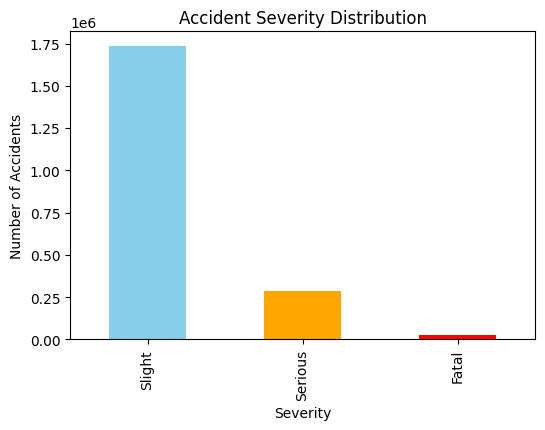

In [16]:
import matplotlib.pyplot as plt

# Count values by Accident Severity
severity_counts = df['Accident_Severity'].value_counts()

plt.figure(figsize=(6,4))
severity_counts.plot(kind='bar', color=['skyblue','orange','red'])
plt.title('Accident Severity Distribution')
plt.xlabel('Severity')
plt.ylabel('Number of Accidents')
plt.show()


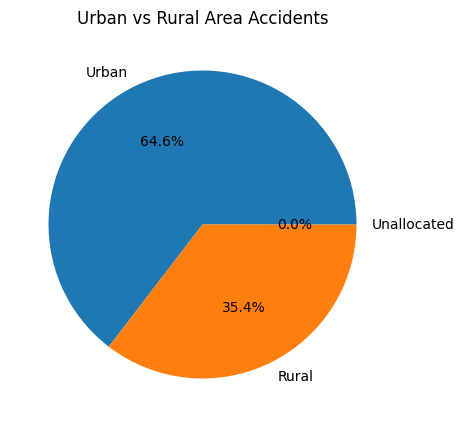

In [17]:
df['Urban_or_Rural_Area'].value_counts().plot(
    kind='pie', autopct='%1.1f%%', figsize=(5,5))
plt.title('Urban vs Rural Area Accidents')
plt.ylabel('')
plt.show()
